In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import datetime

from sklearn.linear_model import LogisticRegression
import sklearn.metrics
from sklearn.preprocessing import PolynomialFeatures

In [2]:
folder_dir = '../data/'
date_range = ["2012","2013","2014","2015","2016","2017"]

In [3]:
for i in range(len(date_range)):
    year = date_range[i]
    data_path = "MLB_" + year + "/MLB_PitchFX_" + year + "_RegularSeason.csv"
    year_data = pd.read_csv(filepath_or_buffer= folder_dir + data_path, header=0)
    
    if i == 0:
        data = year_data
    else:
        data = pd.concat([data,year_data])

data.head()

,date,stadium,inning,side,pitcher,pitch_count,batter,balls,strikes,ay,...,break_length,y,x0,on_1b,on_2b,on_3b,umpcall,outcome,offense_score,defense_score
0,2012-04-04,Marlins Park,1,top,johnsjo09,5,beltrca01,0,0,30.626,...,3.4,154.56,-1.902,NaN,NaN,NaN,X,Single,0,0
1,2012-04-04,Marlins Park,1,top,johnsjo09,6,hollima01,0,0,28.580,...,3.8,132.11,-2.052,beltrca01,NaN,NaN,S,NaN,0,0
2,2012-04-04,Marlins Park,1,top,johnsjo09,7,hollima01,0,1,31.294,...,3.7,125.20,-2.130,beltrca01,NaN,NaN,S,NaN,0,0
3,2012-04-04,Marlins Park,1,top,johnsjo09,8,hollima01,0,2,33.548,...,3.6,151.97,-2.100,beltrca01,NaN,NaN,B,NaN,0,0
4,2012-04-04,Marlins Park,1,top,johnsjo09,9,hollima01,1,2,24.925,...,7.1,144.20,-2.312,beltrca01,NaN,NaN,X,Flyout,0,0


In [4]:
'''
TODO:
    -More exploratory data analysis
    -Feature engineering/Clean data/select features
    -Define target valuable   
    
'''

'\nTODO:\n    -More exploratory data analysis\n    -Feature engineering/Clean data/select features\n    -Define target valuable   \n    \n'

In [5]:
data = data.drop(['on_1b', 'on_2b', "on_3b",'y'], axis = 1)
data.shape

(3902210, 43)

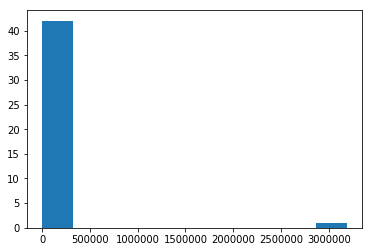

In [6]:
_ = plt.hist(data.isnull().sum())

In [7]:
print(len(data.columns.values))
print(data.columns.values[0])
data.columns.values

43
date


array(['date', 'stadium', 'inning', 'side', 'pitcher', 'pitch_count',
       'batter', 'balls', 'strikes', 'ay', 'px', 'ax', 'sz_bot', 'vz0',
       'vy0', 'pfx_x', 'type_confidence', 'z0', 'tfs', 'pz', 'start_speed',
       'az', 'zone', 'break_angle', 'spin_dir', 'end_speed', 'vx0',
       'sz_top', 'nasty', 'descr', 'pfx_z', 'break_y', 'pitch_type',
       'tfs_zulu', 'x', 'spin_rate', 'y0', 'break_length', 'x0', 'umpcall',
       'outcome', 'offense_score', 'defense_score'], dtype=object)

In [8]:
data.isnull().sum()

date                     0
stadium                  0
inning                   0
side                     0
pitcher                313
pitch_count              0
batter                   5
balls                    0
strikes                  0
ay                       0
px                       0
ax                       0
sz_bot                   0
vz0                      0
vy0                      0
pfx_x                    0
type_confidence          0
z0                       0
tfs                     29
pz                       0
start_speed              0
az                       0
zone                     0
break_angle              0
spin_dir                 0
end_speed                0
vx0                      0
sz_top                   0
nasty                  317
descr                    0
pfx_z                    0
break_y                  0
pitch_type               0
tfs_zulu                29
x                        0
spin_rate                0
y0                       0
b

In [9]:
data.dtypes

date                object
stadium             object
inning               int64
side                object
pitcher             object
pitch_count          int64
batter              object
balls                int64
strikes              int64
ay                 float64
px                 float64
ax                 float64
sz_bot             float64
vz0                float64
vy0                float64
pfx_x              float64
type_confidence    float64
z0                 float64
tfs                float64
pz                 float64
start_speed        float64
az                 float64
zone                 int64
break_angle        float64
spin_dir           float64
end_speed          float64
vx0                float64
sz_top             float64
nasty              float64
descr               object
pfx_z              float64
break_y            float64
pitch_type          object
tfs_zulu            object
x                  float64
spin_rate          float64
y0                 float64
b

### Finding feature types

In [10]:
g = data.columns.to_series().groupby(data.dtypes).groups
dtype_groups = {k.name: v for k, v in g.items()}
dtype_groups

{'float64': Index(['ay', 'px', 'ax', 'sz_bot', 'vz0', 'vy0', 'pfx_x', 'type_confidence',
        'z0', 'tfs', 'pz', 'start_speed', 'az', 'break_angle', 'spin_dir',
        'end_speed', 'vx0', 'sz_top', 'nasty', 'pfx_z', 'break_y', 'x',
        'spin_rate', 'y0', 'break_length', 'x0'],
       dtype='object'),
 'int64': Index(['inning', 'pitch_count', 'balls', 'strikes', 'zone', 'offense_score',
        'defense_score'],
       dtype='object'),
 'object': Index(['date', 'stadium', 'side', 'pitcher', 'batter', 'descr', 'pitch_type',
        'tfs_zulu', 'umpcall', 'outcome'],
       dtype='object')}

In [11]:
dtype_groups["int64"].values

array(['inning', 'pitch_count', 'balls', 'strikes', 'zone',
       'offense_score', 'defense_score'], dtype=object)

In [12]:
dtype_groups["float64"].values

array(['ay', 'px', 'ax', 'sz_bot', 'vz0', 'vy0', 'pfx_x',
       'type_confidence', 'z0', 'tfs', 'pz', 'start_speed', 'az',
       'break_angle', 'spin_dir', 'end_speed', 'vx0', 'sz_top', 'nasty',
       'pfx_z', 'break_y', 'x', 'spin_rate', 'y0', 'break_length', 'x0'], dtype=object)

In [13]:
dtype_groups["object"].values

array(['date', 'stadium', 'side', 'pitcher', 'batter', 'descr',
       'pitch_type', 'tfs_zulu', 'umpcall', 'outcome'], dtype=object)

### Analyze the index

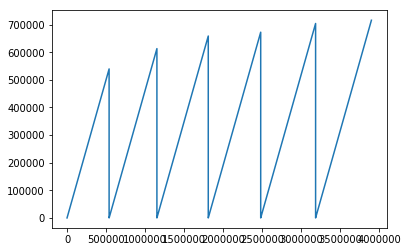

In [14]:
_ = plt.plot(data.index)

### Converting "date" feature to datetime

In [15]:
data["date"]

0         2012-04-04
1         2012-04-04
2         2012-04-04
3         2012-04-04
4         2012-04-04
5         2012-04-04
6         2012-04-04
7         2012-04-04
8         2012-04-04
9         2012-04-04
10        2012-04-04
11        2012-04-04
12        2012-04-04
13        2012-04-04
14        2012-04-04
15        2012-04-04
16        2012-04-04
17        2012-04-04
18        2012-04-04
19        2012-04-04
20        2012-04-04
21        2012-04-04
22        2012-04-04
23        2012-04-04
24        2012-04-04
25        2012-04-04
26        2012-04-04
27        2012-04-04
28        2012-04-04
29        2012-04-04
             ...    
715507    2017-10-01
715508    2017-10-01
715509    2017-10-01
715510    2017-10-01
715511    2017-10-01
715512    2017-10-01
715513    2017-10-01
715514    2017-10-01
715515    2017-10-01
715516    2017-10-01
715517    2017-10-01
715518    2017-10-01
715519    2017-10-01
715520    2017-10-01
715521    2017-10-01
715522    2017-10-01
715523    201

In [16]:
data["date"][0:5]

0    2012-04-04
1    2012-04-04
2    2012-04-04
3    2012-04-04
4    2012-04-04
Name: date, dtype: object

In [17]:
pd.to_datetime(data["date"][0:5])

0   2012-04-04
1   2012-04-04
2   2012-04-04
3   2012-04-04
4   2012-04-04
Name: date, dtype: datetime64[ns]

In [18]:
data["date"] = pd.to_datetime(data["date"])

In [19]:
data["date"][0:5]

0   2012-04-04
1   2012-04-04
2   2012-04-04
3   2012-04-04
4   2012-04-04
Name: date, dtype: datetime64[ns]

### sorting by pitcher, date and pitch_count in that order and reset index

In [20]:
data = data.sort_values(by = ["pitcher","date", "pitch_count"])
data

,date,stadium,inning,side,pitcher,pitch_count,batter,balls,strikes,ay,...,tfs_zulu,x,spin_rate,y0,break_length,x0,umpcall,outcome,offense_score,defense_score
516886,2012-09-27,Rogers Centre,8,bottom,aardsda01,1,lindad01,0,0,30.0560,...,2012-09-28 01:18:53,116.74,2317.690,50.0,3.1,-2.01600,S,NaN,5,5
516887,2012-09-27,Rogers Centre,8,bottom,aardsda01,2,lindad01,0,1,32.0220,...,2012-09-28 01:19:08,124.46,2354.990,50.0,3.8,-2.06800,S,NaN,5,5
516888,2012-09-27,Rogers Centre,8,bottom,aardsda01,3,lindad01,0,2,28.0490,...,2012-09-28 01:19:26,121.03,1636.480,50.0,6.3,-1.96900,S,NaN,5,5
516889,2012-09-27,Rogers Centre,8,bottom,aardsda01,4,lindad01,0,2,30.4990,...,2012-09-28 01:19:51,184.55,2380.220,50.0,3.8,-2.44100,B,NaN,5,5
516890,2012-09-27,Rogers Centre,8,bottom,aardsda01,5,lindad01,1,2,25.1680,...,2012-09-28 01:20:07,132.19,1034.360,50.0,7.0,-2.35200,S,NaN,5,5
516891,2012-09-27,Rogers Centre,8,bottom,aardsda01,6,lindad01,1,2,30.3840,...,2012-09-28 01:20:32,140.77,2491.110,50.0,4.2,-1.98200,X,Groundout,5,5
516892,2012-09-27,Rogers Centre,8,bottom,aardsda01,7,arencjp01,0,0,30.1620,...,2012-09-28 01:21:06,138.20,2269.490,50.0,3.4,-2.10000,X,Home Run,5,5
516893,2012-09-27,Rogers Centre,8,bottom,aardsda01,8,johnske05,0,0,24.8640,...,2012-09-28 01:21:51,99.57,2030.960,50.0,7.2,-1.86600,S,NaN,6,6
516894,2012-09-27,Rogers Centre,8,bottom,aardsda01,9,johnske05,0,1,24.2140,...,2012-09-28 01:22:02,151.93,1380.710,50.0,7.1,-2.22200,B,NaN,6,6
516895,2012-09-27,Rogers Centre,8,bottom,aardsda01,10,johnske05,1,1,29.4320,...,2012-09-28 01:22:15,151.07,2230.470,50.0,3.2,-2.05100,B,NaN,6,6


In [21]:
data = data.reset_index(drop = True)
data

,date,stadium,inning,side,pitcher,pitch_count,batter,balls,strikes,ay,...,tfs_zulu,x,spin_rate,y0,break_length,x0,umpcall,outcome,offense_score,defense_score
0,2012-09-27,Rogers Centre,8,bottom,aardsda01,1,lindad01,0,0,30.0560,...,2012-09-28 01:18:53,116.74,2317.690,50.0,3.1,-2.01600,S,NaN,5,5
1,2012-09-27,Rogers Centre,8,bottom,aardsda01,2,lindad01,0,1,32.0220,...,2012-09-28 01:19:08,124.46,2354.990,50.0,3.8,-2.06800,S,NaN,5,5
2,2012-09-27,Rogers Centre,8,bottom,aardsda01,3,lindad01,0,2,28.0490,...,2012-09-28 01:19:26,121.03,1636.480,50.0,6.3,-1.96900,S,NaN,5,5
3,2012-09-27,Rogers Centre,8,bottom,aardsda01,4,lindad01,0,2,30.4990,...,2012-09-28 01:19:51,184.55,2380.220,50.0,3.8,-2.44100,B,NaN,5,5
4,2012-09-27,Rogers Centre,8,bottom,aardsda01,5,lindad01,1,2,25.1680,...,2012-09-28 01:20:07,132.19,1034.360,50.0,7.0,-2.35200,S,NaN,5,5
5,2012-09-27,Rogers Centre,8,bottom,aardsda01,6,lindad01,1,2,30.3840,...,2012-09-28 01:20:32,140.77,2491.110,50.0,4.2,-1.98200,X,Groundout,5,5
6,2012-09-27,Rogers Centre,8,bottom,aardsda01,7,arencjp01,0,0,30.1620,...,2012-09-28 01:21:06,138.20,2269.490,50.0,3.4,-2.10000,X,Home Run,5,5
7,2012-09-27,Rogers Centre,8,bottom,aardsda01,8,johnske05,0,0,24.8640,...,2012-09-28 01:21:51,99.57,2030.960,50.0,7.2,-1.86600,S,NaN,6,6
8,2012-09-27,Rogers Centre,8,bottom,aardsda01,9,johnske05,0,1,24.2140,...,2012-09-28 01:22:02,151.93,1380.710,50.0,7.1,-2.22200,B,NaN,6,6
9,2012-09-27,Rogers Centre,8,bottom,aardsda01,10,johnske05,1,1,29.4320,...,2012-09-28 01:22:15,151.07,2230.470,50.0,3.2,-2.05100,B,NaN,6,6


## 1. Target variable
We classify a pitch as good if it induces a swinging strike, a called strike, a foul, or if it generates a
ball in play that is converted to an out

In [22]:
data.outcome.unique()

array([nan, 'Groundout', 'Home Run', 'Forceout', 'Flyout', 'Pop Out',
       'Single', 'Grounded Into DP', 'Lineout', 'Double', 'Sac Bunt',
       'Sac Fly', 'Bunt Pop Out', 'Field Error', 'Double Play',
       'Fan interference', 'Triple', 'Fielders Choice', 'Bunt Groundout',
       'Fielders Choice Out', 'Sac Fly DP', 'Batter Interference',
       'Triple Play', 'Catcher Interference', 'Bunt Lineout',
       'Sacrifice Bunt DP', 'Fly Out', 'Reach on Error',
       'Pitcher Interference'], dtype=object)

In [23]:
data.umpcall.unique()

array(['S', 'B', 'X'], dtype=object)

In [24]:
data.descr.unique()

array(['Called Strike', 'Foul', 'Ball', 'In play, out(s)',
       'In play, run(s)', 'Swinging Strike', 'Swinging Strike (Blocked)',
       'Ball In Dirt', 'Foul Tip', 'In play, no out', 'Hit By Pitch',
       'Foul (Runner Going)', 'Foul Bunt', 'Missed Bunt'], dtype=object)

In [25]:
#Using descr feature to define good pitch
g_outcomes=['Foul Tip','Swinging Strike','In play, out(s)', 'Called Strike', 'Foul','Foul (Runner Going)','Foul Bunt',
       'Swinging Strike (Blocked)', 'Missed Bunt' ]

#Using outcome feature to use more detailed descriptions (eg: lineout vs groundout). I think this approach is better
g_outcomes2=['Flyout', 'Fly Out','Groundout','Pop Out','Forceout','Double Play','Grounded into DP','Fielders Choice','Fielders Choice Out', 
             'Bunt Groundout','Bunt Pop Out','Sac Fly DP','Bunt Lineout','Foul']

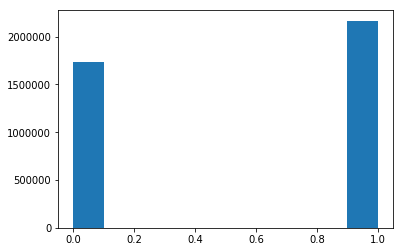

In [26]:
#Create target feature
data['y']=np.where((data['outcome'].isin(g_outcomes2)) | (data['umpcall']=='S'),1,0)
a=plt.hist(data['y'])

In [27]:
data.y.unique(), data.y.isnull().any()

(array([1, 0], dtype=int64), False)

In [28]:
data.columns

Index(['date', 'stadium', 'inning', 'side', 'pitcher', 'pitch_count', 'batter',
       'balls', 'strikes', 'ay', 'px', 'ax', 'sz_bot', 'vz0', 'vy0', 'pfx_x',
       'type_confidence', 'z0', 'tfs', 'pz', 'start_speed', 'az', 'zone',
       'break_angle', 'spin_dir', 'end_speed', 'vx0', 'sz_top', 'nasty',
       'descr', 'pfx_z', 'break_y', 'pitch_type', 'tfs_zulu', 'x', 'spin_rate',
       'y0', 'break_length', 'x0', 'umpcall', 'outcome', 'offense_score',
       'defense_score', 'y'],
      dtype='object')

In [29]:
data.dtypes

date               datetime64[ns]
stadium                    object
inning                      int64
side                       object
pitcher                    object
pitch_count                 int64
batter                     object
balls                       int64
strikes                     int64
ay                        float64
px                        float64
ax                        float64
sz_bot                    float64
vz0                       float64
vy0                       float64
pfx_x                     float64
type_confidence           float64
z0                        float64
tfs                       float64
pz                        float64
start_speed               float64
az                        float64
zone                        int64
break_angle               float64
spin_dir                  float64
end_speed                 float64
vx0                       float64
sz_top                    float64
nasty                     float64
descr         

# EDA

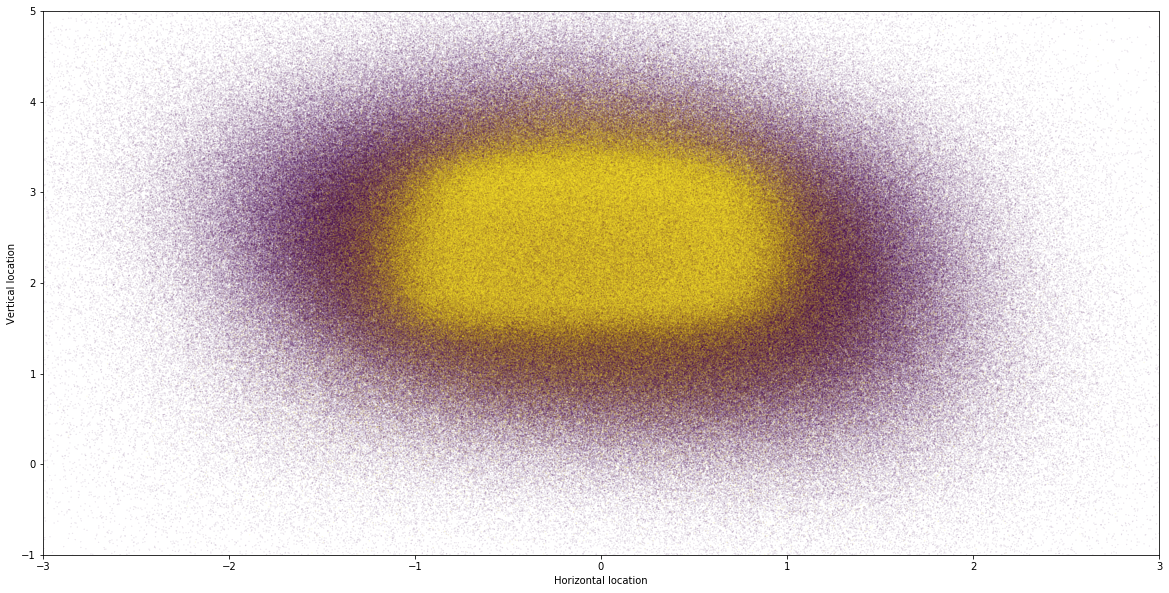

In [ ]:
plt.figure(figsize=(20,10))
plt.xlim(-3,3)
plt.ylim(0,5)
plt.scatter(data['px'],data['pz'],s=.05, c=data['y'], alpha=0.2);
plt.xlabel('Horizontal location')
plt.ylabel('Vertical location')
plt.savefig('strike_zone.jpg')

In [ ]:
plt.bar(data['start_speed'],data['y'])

KeyboardInterrupt: 

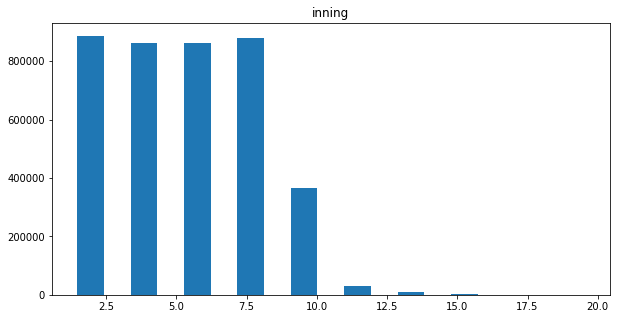

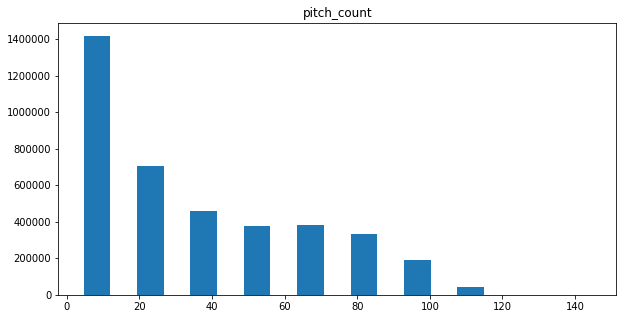

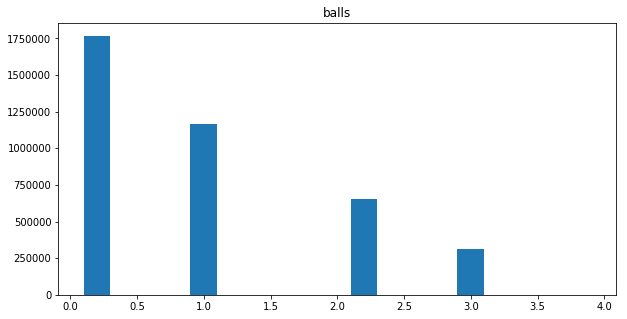

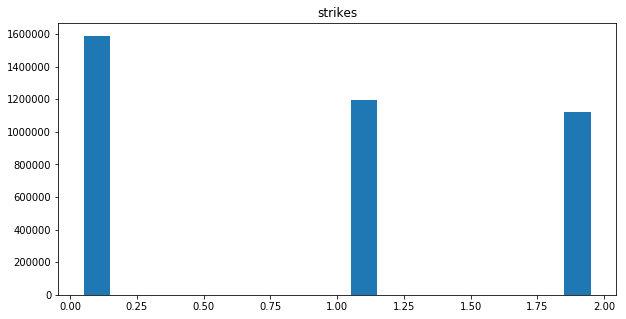

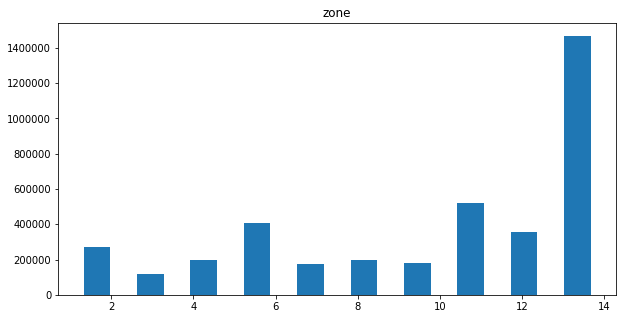

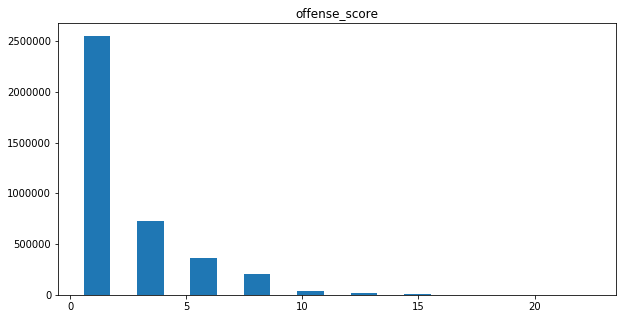

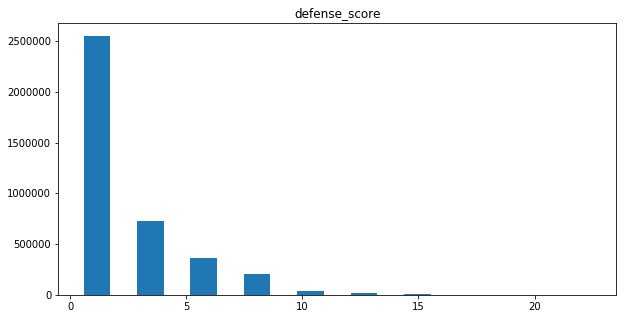

In [97]:
#Plotting all Int64 typed features
for i in range(len(dtype_groups["int64"].values)):
    plt.figure(i, 
               figsize=(10,5))
    plt.title(dtype_groups["int64"].values[i])
    plt.hist(data[dtype_groups["int64"].values[i]],
             rwidth = 0.5)

C:\Anaconda3\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


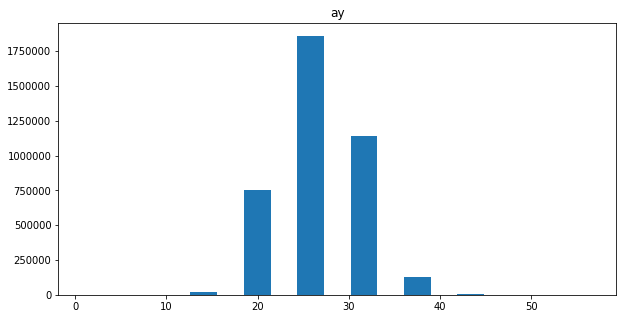

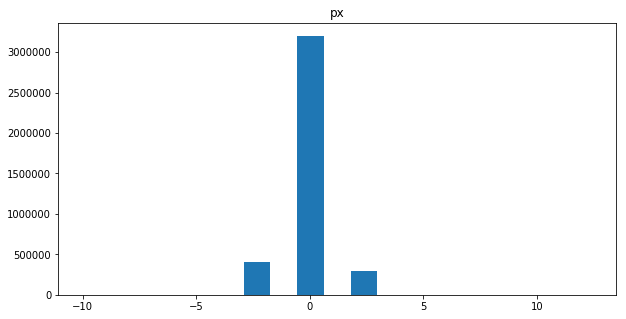

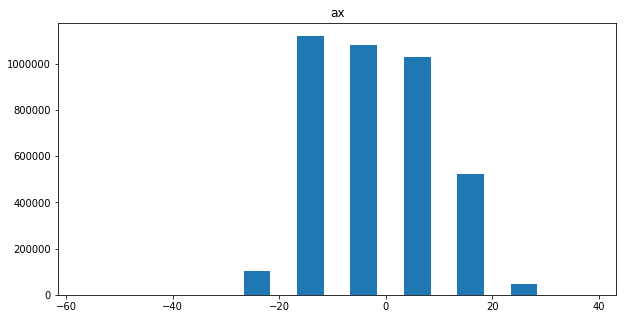

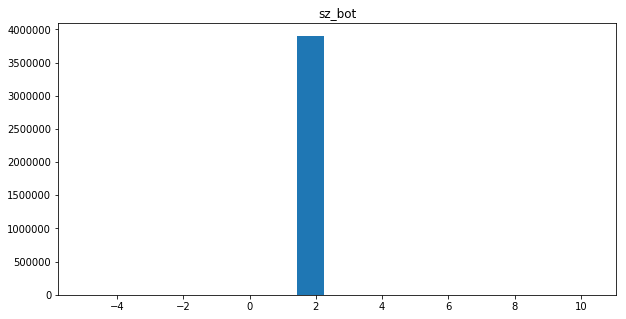

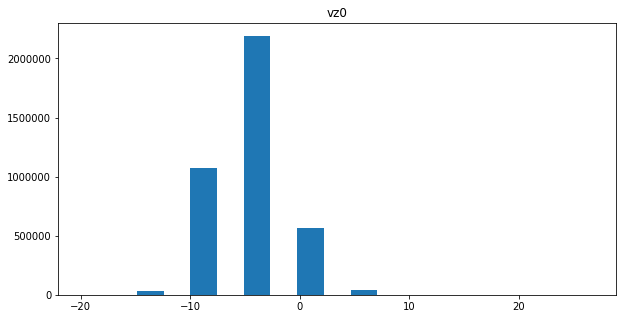

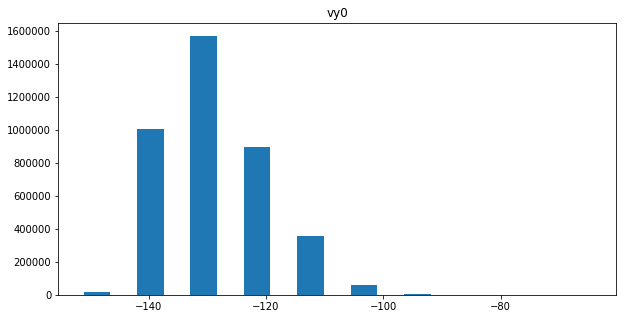

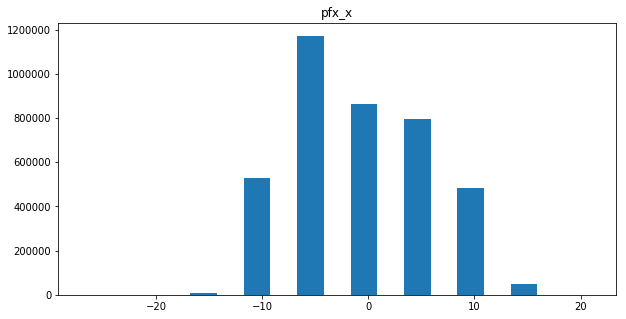

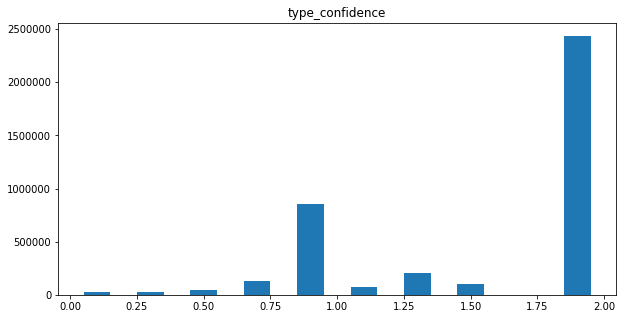

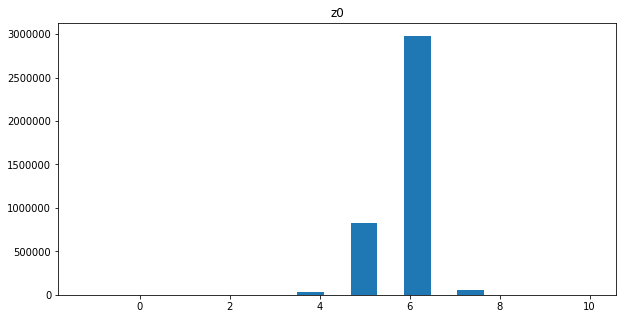

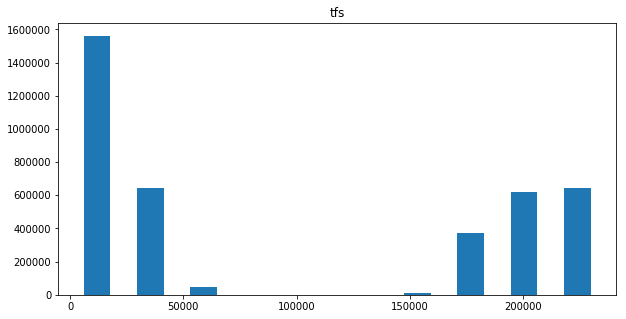

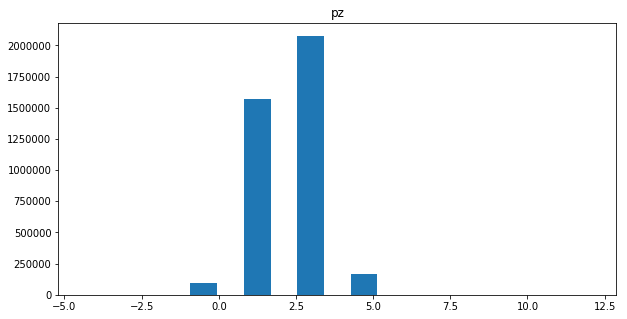

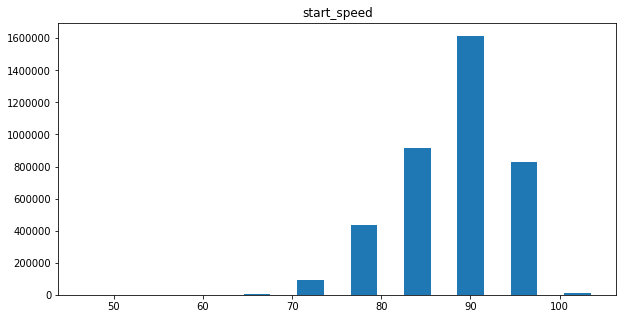

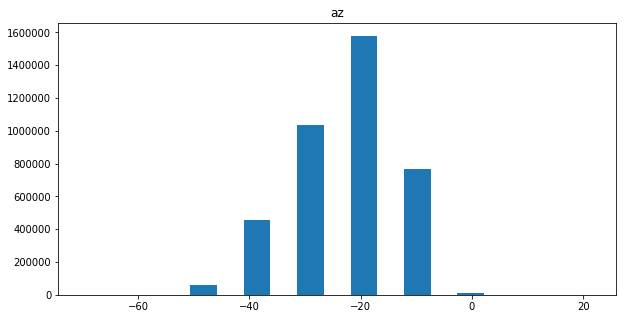

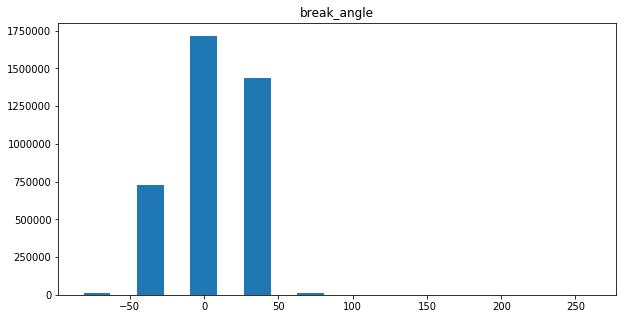

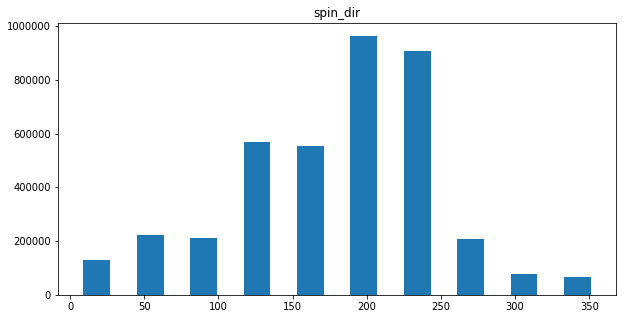

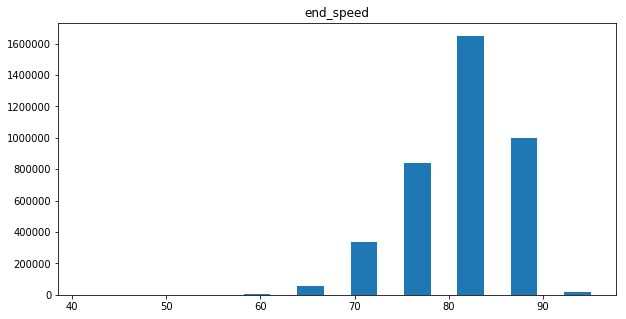

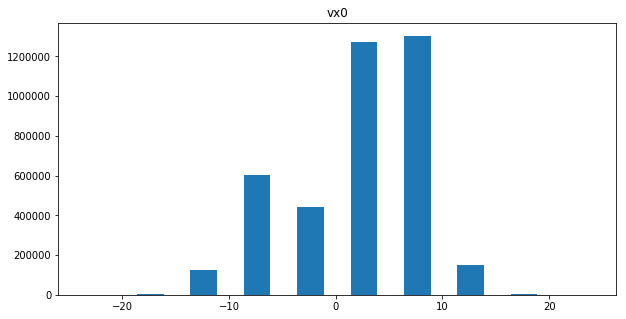

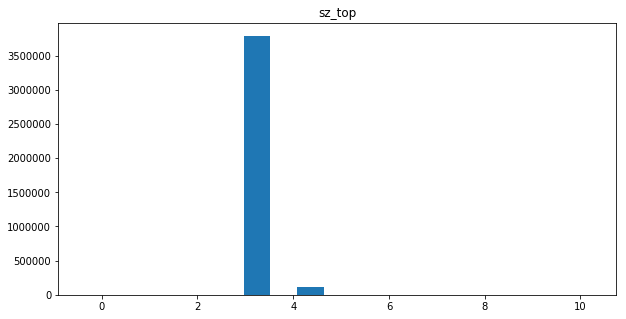

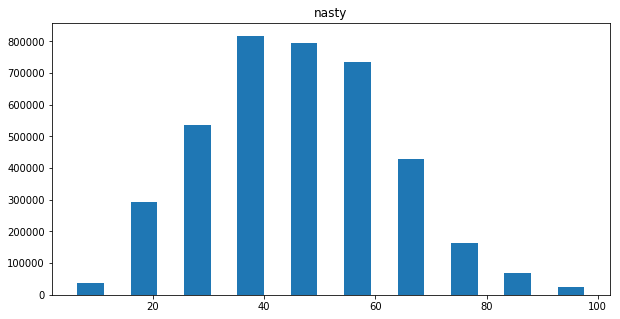

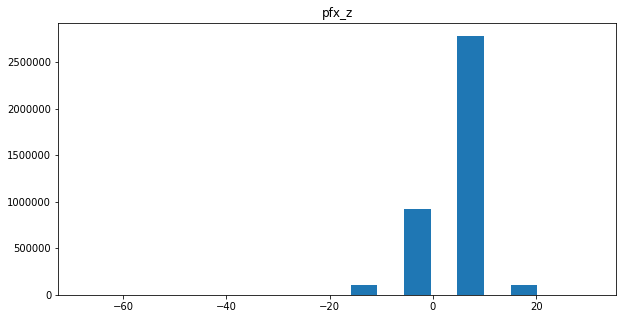

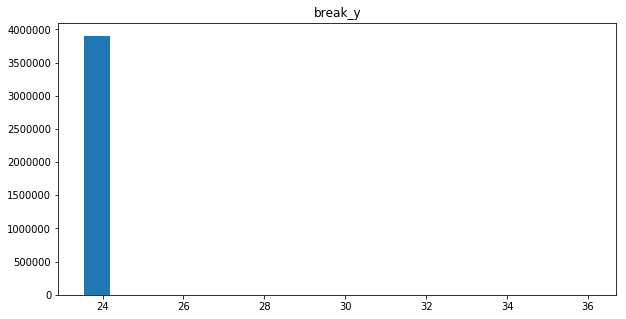

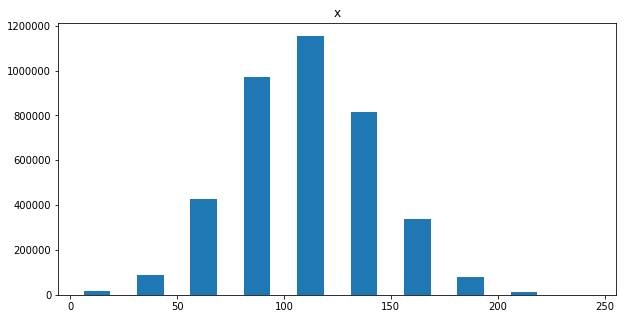

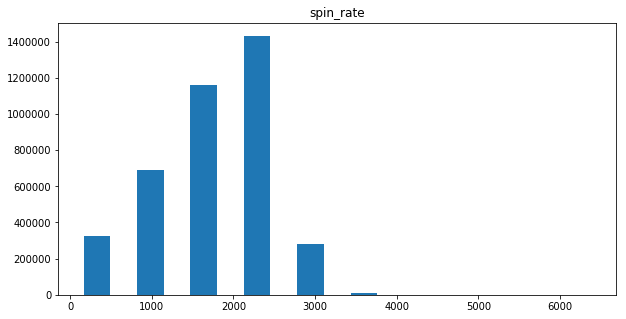

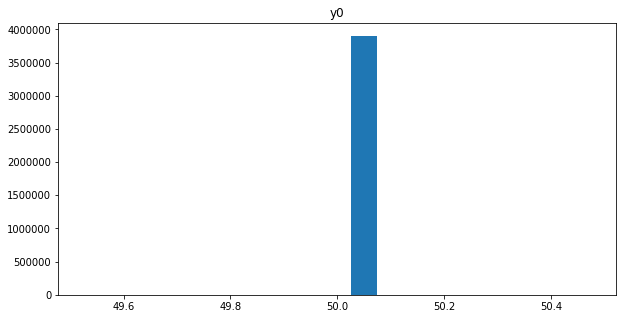

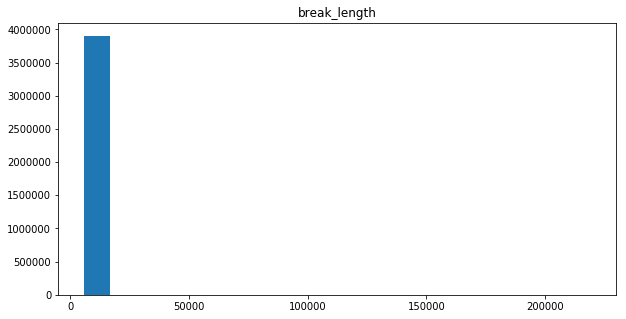

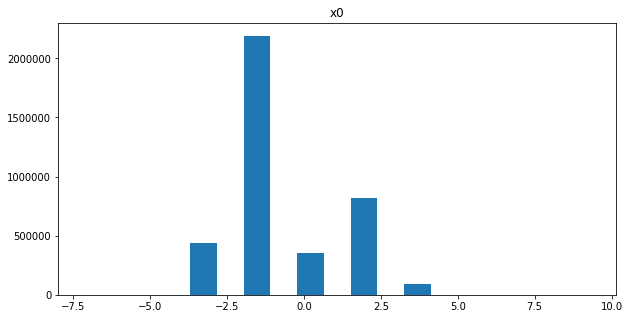

In [98]:
#Plotting all Float64 typed features
for i in range(len(dtype_groups["float64"].values)):
    plt.figure(i, 
               figsize=(10,5))
    plt.title(dtype_groups["float64"].values[i])
    plt.hist(data[dtype_groups["float64"].values[i]].dropna(),
             rwidth = 0.5)

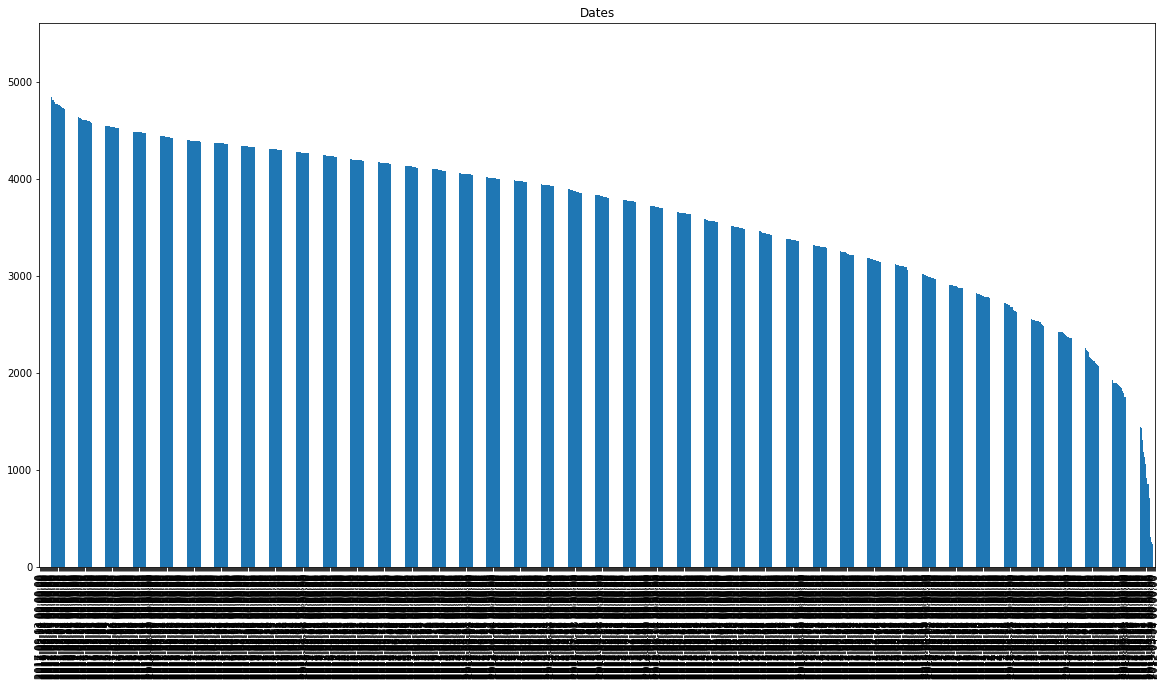

In [ ]:
_ = data[dtype_groups["object"][0]].value_counts().plot(kind="bar",
                                                    figsize=(20,10),
                                                    title = "Dates")

In [ ]:
#Plotting all Object typed features
for i in range(len(dtype_groups["object"].values)):
    print(dtype_groups["object"][i])
    _ = data[dtype_groups["object"][i]].value_counts().plot(kind="bar",
                                                       figsize=(20,10),
                                                       title = dtype_groups["object"][i])

date
stadium
side
pitcher
batter
descr
pitch_type
tfs_zulu


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2862, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-100-6eb3f93901a9>", line 6, in <module>
    title = dtype_groups["object"][i])
  File "C:\Anaconda3\lib\site-packages\pandas\plotting\_core.py", line 2453, in __call__
    **kwds)
  File "C:\Anaconda3\lib\site-packages\pandas\plotting\_core.py", line 1894, in plot_series
    **kwds)
  File "C:\Anaconda3\lib\site-packages\pandas\plotting\_core.py", line 1694, in _plot
    plot_obj.generate()
  File "C:\Anaconda3\lib\site-packages\pandas\plotting\_core.py", line 245, in generate
    self._make_plot()
  File "C:\Anaconda3\lib\site-packages\pandas\plotting\_core.py", line 1223, in _make_plot
    log=self.log, **kwds)
  File "C:\Anaconda3\lib\site-packages\pandas\plotting\_core.py", line 1170, in _plot
    return ax.bar(x, y, w, bottom=start, log=log, **kwds)
  File "C:\Anaconda3\lib\s

KeyboardInterrupt: 

ERROR:tornado.general:Uncaught exception, closing connection.
Traceback (most recent call last):
  File "C:\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "C:\Anaconda3\lib\site-packages\tornado\stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "C:\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "C:\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 235, in dispatch_shell
    handler(stream, idents, msg)
  File "C:\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "C:\Anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "C:\Anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 533, in run_cell
    return super(ZMQ

In [ ]:
plt.hist(data['zone'])

In [ ]:
plt.hist(data['spin_dir'])

# Rolling_mean feature

In [ ]:
#data = data.sample(n = 1000)
data.shape

In [ ]:
data.loc[data['pitch_type'] == "FF"]["start_speed"][0:5]

In [ ]:
roll_means = data.loc[data['pitch_type'] == "FF"].groupby('pitcher')['start_speed'].rolling(5).mean()
roll_means

check where the NaNs are to see if rolling averages use data from previous pitchers

In [ ]:
roll_means.values

In [ ]:
nan_roll_means = pd.DataFrame(np.argwhere(np.isnan(roll_means.values)))
nan_roll_means

It seems like rolling mean is not using values from previous pitchers.

Take only the numeric index and discard the pitcher index:

In [ ]:
roll_means = pd.DataFrame(roll_means)
roll_means

In [ ]:
roll_means.index.values

In [ ]:
roll_means = roll_means.reset_index()
roll_means.head()

In [ ]:
roll_means = roll_means.drop("pitcher", axis = 1)
roll_means.head()

In [ ]:
roll_means.columns.values[1] = "rolling_start_speed"

In [ ]:
roll_means

In [ ]:
roll_means = roll_means.set_index("level_1")
roll_means.head()

In [ ]:
data = pd.concat([data,roll_means], axis = 1)
data

Ok, now we have the rolling means in the data dataframe but there are NaNs in the beginning of rolling means for each pitcher and between fastballs. So pad NaNs with the last value and change each beginning sequence for each pitcher back to NaN (because they will be padded with the previous pitcher's end rolling mean)

Padding the NaNs to the futureeee!

In [ ]:
padded_roll_means = data["rolling_start_speed"].fillna(method = "ffill")
padded_roll_means

In [ ]:
nan_roll_means.values.reshape(1,-1)[0]

In [ ]:
len(nan_roll_means.values)

In [ ]:
padded_roll_means[nan_roll_means.values.reshape(1,-1)[0]]

In [ ]:
padded_roll_means[nan_roll_means.values.reshape(1,-1)[0]] = np.nan
padded_roll_means[nan_roll_means.values.reshape(1,-1)[0]]

So changed the starting sequence of fastballs back to NaN

Replacing rolling means with the padded ones:

In [ ]:
data["rolling_start_speed"] = padded_roll_means
data

### Deleting rows with no pitchers

In [ ]:
data["pitcher"].values

In [ ]:
data["pitcher"].values[-1]

In [ ]:
type(data["pitcher"].values[-1])

In [ ]:
import math

In [ ]:
math.isnan(data["pitcher"].values[-1])

In [ ]:
data["pitcher"] = data["pitcher"].astype("str")
data["pitcher"]

In [ ]:
nan_pitchers = pd.DataFrame(np.argwhere(data["pitcher"] == "nan")).values
nan_pitchers = nan_pitchers.reshape(1,-1)[0]
nan_pitchers

In [ ]:
data = data.drop(nan_pitchers)
data

### Adding 20 pitch rolling mean

In [ ]:
data.shape

In [ ]:
long_roll_means = data.loc[data['pitch_type'] == "FF"]\
                    .groupby('pitcher')['start_speed']\
                    .rolling(20).mean()

nan_longroll_means = pd.DataFrame(np.argwhere(np.isnan(long_roll_means.values)))

long_roll_means = pd.DataFrame(long_roll_means)
long_roll_means = long_roll_means.reset_index()
long_roll_means = long_roll_means.drop("pitcher", axis = 1)
long_roll_means.columns.values[1] = "long_rolling_start_speed"
long_roll_means = long_roll_means.set_index("level_1")



data = pd.concat([data,long_roll_means], axis = 1)
padded_long_roll_means = data["long_rolling_start_speed"].fillna(method = "ffill")
padded_long_roll_means[nan_longroll_means.values.reshape(1,-1)[0]] = np.nan
data["long_rolling_start_speed"] = padded_long_roll_means
data

Check number of not nan rows in the long windowed rolling mean

In [ ]:
len(np.argwhere(np.isnan(data["long_rolling_start_speed"])))

In [ ]:
data.shape

### Deleting rows with NaN in long rolling mean column

In [ ]:
np.argwhere(np.isnan(data["long_rolling_start_speed"])).reshape(1,-1)[0]

In [ ]:
data = data.drop(np.argwhere(np.isnan(data["long_rolling_start_speed"])).reshape(1,-1)[0],
          axis = 0)
data

## 3. Generate features: batter-pitcher_count, zones, regions(From RandomForest)

### Generate batter-pitcher count
##### https://twitter.com/darenw/status/985168614008508416 (cool image)

In [ ]:
data['count_b_p']=np.where((data['strikes']>data['balls']),2,0)

data['count_b_p']=np.where(((data['strikes']==0) & (data['balls']==0)),1,data['count_b_p'])
data['count_b_p']=np.where(((data['strikes']==1) & (data['balls']==1)),1,data['count_b_p'])

# 2-2 is a pitchers' count
data['count_b_p']=np.where(((data['strikes']==2) & (data['balls']==2)),2,data['count_b_p'])
plt.hist(data.count_b_p);

### One-hot encode zone

In [ ]:
data['zone'].unique()

In [ ]:
zone=pd.get_dummies(data['zone'],prefix='zone').drop('zone_14',axis=1)
data=pd.concat([data,zone],axis=1).drop('zone',axis=1)

### Save data

In [ ]:
#Drop columns we´re not going to use
#data['year']=data['date'].str.slice(0,4)
data['year']=data['date'].dt.year

features=['date','umpcall', 'outcome','start_speed','pfx_x','pfx_z','px','pz','break_y','break_angle','break_length'
          ,'pitch_type','spin_dir','nasty','pitch_count','descr','y','year','zone','strikes','balls','pitcher','pitch_type',
         'rolling_start_speed', 'long_rolling_start_speed','regions','zone_1', 'zone_2', 'zone_3','zone_4', 'zone_5', 'zone_6',
          'zone_7', 'zone_8', 'zone_9', 'zone_11','zone_12', 'zone_13']

baseline_features=['start_speed','px','pz','year','y']

data=data[features]
data_base=data[baseline_features]

In [ ]:
#data_path = "MLB_" + year + "/MLB_PitchFX_" + year + "_RegularSeason.csv"
#year_data = pd.read_csv(filepath_or_buffer= folder_dir + data_path, header=0)
save_path=folder_dir+'data_clean.csv'
data.to_csv(save_path) 

## 3. Baseline with Logistic Regression

In [ ]:
poly = PolynomialFeatures(interaction_only=True, include_bias=False)
X_train=poly.fit_transform(X_train)
X_test=poly.fit_transform(X_test)

In [ ]:
X_train.shape, X_test.shape

In [ ]:
baseline=LogisticRegression()
baseline.fit(X_train,y_train)

In [ ]:
#print(list(zip(list(X_train.columns),list(baseline.coef_[0]))))
baseline.coef_

In [ ]:
probs=baseline.predict_proba(X_test)[:,1]
preds=baseline.predict(X_test)
baseline_loss=sklearn.metrics.log_loss(y_test,probs)
baseline_acc=sklearn.metrics.accuracy_score(y_test,preds)
majority_class=np.amax(y_test.value_counts(normalize=True))

print('%s: %0.2f, %s: %0.2f, %s: %0.2f '
      %('Baseline accuracy',baseline_acc,'Baseline log loss', baseline_loss,'Majority class',majority_class))